In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
     ---------------------------------------- 8.0/8.0 MB 11.3 MB/s eta 0:00:00
  Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl (188 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 2.2/2.2 MB 14.0 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl (56 kB)
  Using cached pillow-10.3.0-cp311-cp311-win_amd64.whl (2.5 MB)
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: C:\Users\mikolaj\Desktop\Studia\2_rok\wum\zal2_env\Scripts\python.exe -m pip install --upgrade pip


# 1

In [1]:
import pandas as pd
import numpy as np

Loading data form csv files

In [2]:
x_train = pd.read_csv('X_train.csv', sep=',')

y_train_raw = pd.read_csv('Y_train.csv', sep=',')

x_test = pd.read_csv('X_test.csv', sep=',')

In [3]:
y_train = y_train_raw[['Expected']]

### a)

Looking for empty places

In [5]:
x_train_na = x_train.columns[x_train.isna().any()].tolist()
y_train_na = y_train.columns[y_train.isna().any()].tolist()
x_test_na = x_test.columns[x_test.isna().any()].tolist()


print("columns in x_train with NaN:", x_train_na)
print("columns y_train with NaN:", y_train_na)
print("columns x_test with NaN:", x_test_na)

columns in x_train with NaN: []
columns y_train with NaN: []
columns x_test with NaN: []


There are no columns with NaN in data

Checking for different types

In [6]:
print("Info for x_train:")
print(x_train.info())
print("Info for y_train:")
print(y_train.info())
print("Info for x_test:")
print(x_test.info())

Info for x_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794 entries, 0 to 3793
Columns: 9000 entries, LINC01409 to AC007325.4
dtypes: float64(9000)
memory usage: 260.5 MB
None
Info for y_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794 entries, 0 to 3793
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Expected  3794 non-null   float64
dtypes: float64(1)
memory usage: 29.8 KB
None
Info for x_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Columns: 9000 entries, LINC01409 to AC007325.4
dtypes: float64(9000)
memory usage: 46.0 MB
None


All data entries are float

We have 3,794 observations in the training data and 670 observations in the test data. There are 9,000 columns of parameters.

Basic data for dependent variables

### b)

In [7]:
y_train.describe()

,Expected
count,3794.000000
mean,0.791096
std,0.860856
min,0.000000
25%,0.000000
50%,0.311748
75%,1.662514
max,2.860416


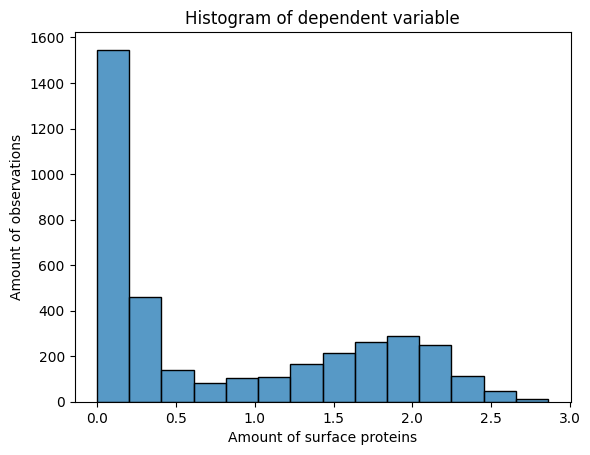

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y_train['Expected'], kde=False)
plt.xlabel('Amount of surface proteins')
plt.ylabel('Amount of observations')
plt.title('Histogram of dependent variable')
plt.show()

The data distribution does not resemble a normal distribution. A significant portion of the observations (over 25%) have a surface protein level of 0.00.

### c)

In [9]:
y_train

,Expected
0,1.565375
1,0.294634
2,0.000000
3,1.294732
4,1.480512
...,...
3789,2.056546
3790,1.821943
3791,1.697391
3792,2.411648


In [108]:
top_corr = corr_with_y.abs().nlargest(250)

In [110]:
top_x_train = x_train[top_corr.index]

In [97]:
corr_250 = top_x_train.corr()

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

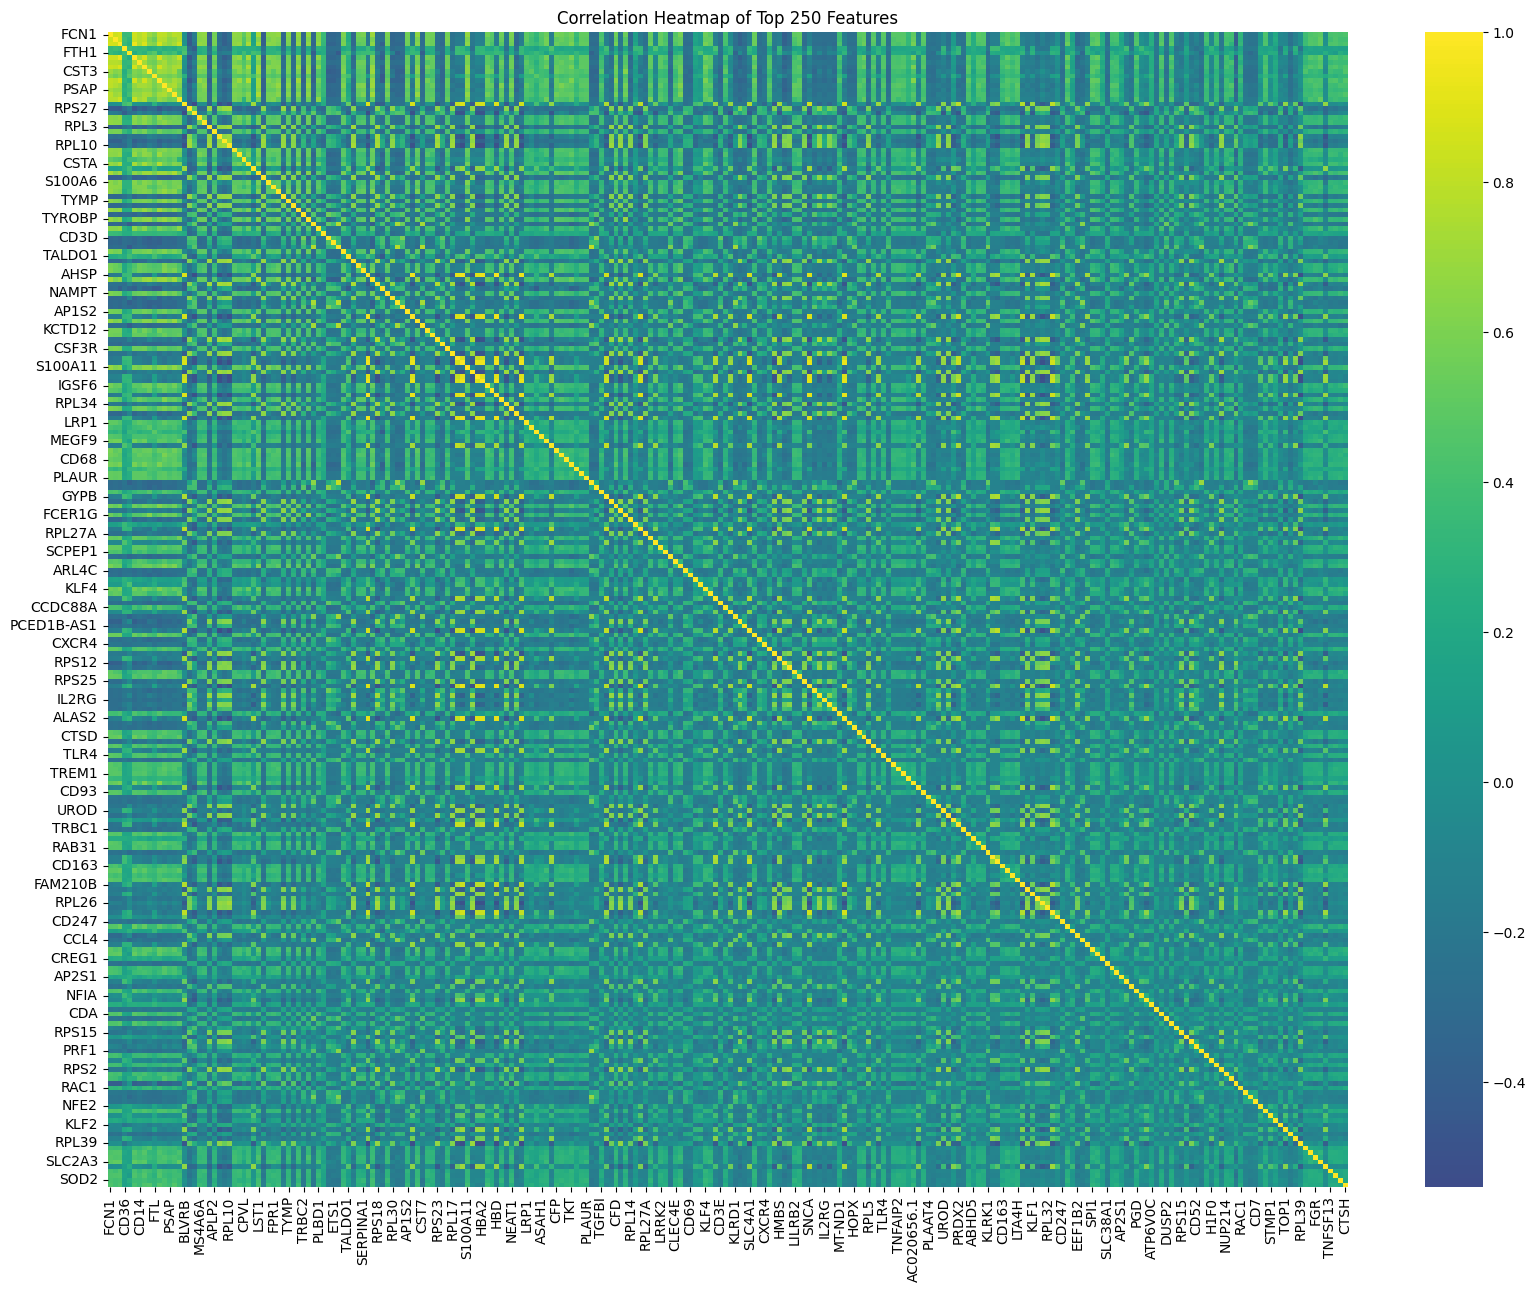

In [112]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr_250, cmap='viridis', center=0, annot=False)
plt.title('Correlation Heatmap of Top 250 Features')
plt.show()

# 2

### a)

The ElasticNet model combines features of ridge regression and lasso. It estimates coefficients for the explanatory variables ($\beta$ in the equation) in a linear relationship, similar to RSS, ridge regression, and lasso:

$$\hat{Y} = \beta_0 + \hat{\beta_1}x_1 + \cdots + \hat{\beta_k}x_k.$$

ElasticNet optimizes the following function:

$$
\sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda_1 \sum_{j=1}^{p} \beta_{j}^{2} + \lambda_2 \sum_{j=1}^{p} |\beta_j|,
$$

where:

- The first term is the residual sum of squares (RSS), representing the fit of the model.
- The second term is the ridge penalty, which is the sum of the squared coefficients scaled by $\lambda_1$.
- The third term is the lasso penalty, which is the sum of the absolute values of the coefficients scaled by $\lambda_2$.

The first term represents the residual sum of squares (RSS), the second term corresponds to the ridge regression penalty, and the third term represents the lasso penalty. The hyperparameters that control the model are $\lambda_1$ and $\lambda_2$.

- For $\lambda_2 = 0$, ElasticNet corresponds to ridge regression with the controlling parameter $\lambda_1$.
- For $\lambda_1 = 0$, ElasticNet corresponds to lasso regression with the controlling parameter $\lambda_2$.

### b)

In our hyperparameter grid, we will adjust the parameter alpha, which scales both $\lambda_1$ and $\lambda_2$, and the parameter l1_ratio, which determines the ratio between $\lambda_1$ and $\lambda_2$ (for l1_ratio = 0, $\lambda_2 = 0$ which corresponds to ridge regression; for l1_ratio = 1, $\lambda_1 = 0$ which corresponds to lasso).

We will explore l1_ratio in the range from 0 to 1 to evaluate how the model performs when the ridge regression component dominates versus when the lasso component dominates. We will use 5-fold cross-validation to reduce the number of model estimations required. The performance of the model will be measured using RMSE (Root Mean Square Error).

Our data has 9,000 parameters and only 3,794 observations, which makes training ElasticNet on all parameters very time-consuming. We can identify the most important components using PCA and select the top 250. Before performing PCA, we will standardize the data. Using the ElasticNet model with parameters l1_ratio set to 0 and 1 results in non-convergence of parameters. We will use alternative methods instead of including these parameters.

In [4]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=250)

s_scaler = StandardScaler()

x_train_scaled = s_scaler.fit_transform(x_train)
y_train_scaled = s_scaler.fit_transform(y_train)

x_train_pca = pca.fit_transform(x_train_scaled)

x_pca = pd.DataFrame(data=x_train_pca)

It is worth noting that when `GridSearchCV` is invoked with a numeric `cv` parameter, it uses `StratifiedKFold` for splitting the data, with the `shuffle` parameter set to `False` by default. This means that whenever `GridSearchCV` is called with the same `cv` on the same dataset, it will validate on the same splits. [StratifiedKFold Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)

In [47]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


model = ElasticNet()

param_grid = {
    'alpha': [0.1, 0.5, 1],
    'l1_ratio': [0.2, 0.5, 0.8]
}

grid_search_en = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    return_train_score=True,
    n_jobs=-1
)

grid_search_en.fit(x_pca, y_train)

best_params_en = grid_search_en.best_params_
best_score_en = -grid_search_en.best_score_
print("Best hyperparameters for ElasticNet:", best_params_en)
print("Best score for ElasticNet:", best_score_en)

Best hyperparameters for ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.2}
Best score for ElasticNet: 0.35654577386007963


In [53]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


model = ElasticNet()

param_grid = {
    'alpha': [0.1, 0.5, 1],
    'l1_ratio': [0.2, 0.5, 0.8]
}

grid_search_en = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    return_train_score=True)

grid_search_en.fit(x_pca, y_train)

best_params_en = grid_search_en.best_params_
best_score_en = -grid_search_en.best_score_
print("Best hyperparameters for ElasticNet:", best_params_en)
print("Best score for ElasticNet:", best_score_en)

Best hyperparameters for ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.2}
Best score for ElasticNet: 0.35748882473835675


In [49]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge_model = Ridge()

param_grid_ridge = {
    'alpha': [0.1, 0.5, 1]
}

grid_search_ridge = GridSearchCV(
    estimator=ridge_model,
    param_grid=param_grid_ridge,
    cv=5,
    scoring='neg_root_mean_squared_error',
    return_train_score=True
)

grid_search_ridge.fit(x_pca, y_train_scaled)
best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = -grid_search_ridge.best_score_
print("Best hyperparameters for Ridge:", best_params_ridge)
print("Best score for Ridge:", best_score_ridge)

Best hyperparameters for Ridge: {'alpha': 1}
Best score for Ridge: 0.42407816851158514


In [50]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

lasso_model = Lasso()
param_grid_lasso = {
    'alpha': [0.1, 0.5, 1]
}

grid_search_lasso = GridSearchCV(
    estimator= lasso_model,
    param_grid=param_grid_lasso,
    cv=5,
    scoring='neg_root_mean_squared_error',
    return_train_score=True
)

grid_search_lasso.fit(x_pca, y_train_scaled)
best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = -grid_search_lasso.best_score_
print("Best hyperparameters for Lasso:", best_params_lasso)
print("Best score for Lasso:", best_score_lasso)

Best hyperparameters for Lasso: {'alpha': 0.1}
Best score for Lasso: 0.4365085796476763


In [7]:
if best_score_lasso < best_score_ridge and best_score_lasso < best_score_en:
    print("Lasso wins")
if best_score_ridge < best_score_lasso and best_score_ridge < best_score_en:
    print("Ridge wins")
if best_score_en < best_score_lasso and best_score_en < best_score_ridge:
    print("Elastic net wins")

Elastic net wins


So, ElasticNet outperformed pure ridge regression and lasso. The best hyperparameters for ElasticNet are *alpha* = 0.1 and *l1_ratio* = 0.2.

Now we can compute the mean error for the test and validation data across the entire grid search. We will average the results from all three models to obtain the final performance metrics.

In [51]:
def get_errors(cv_res):
    train_err = -(cv_res['mean_train_score'])
    test_err = -(cv_res['mean_test_score'])
    return train_err, test_err

def get_stds(cv_res):
    train_std = cv_res['std_train_score']
    test_std = cv_res['std_test_score']
    return train_std, test_std

elastic_net_results = grid_search_en.cv_results_
ridge_results = grid_search_ridge.cv_results_
lasso_results = grid_search_lasso.cv_results_

en_train_err, en_test_err = get_errors(elastic_net_results)
en_train_std, en_test_std = get_stds(elastic_net_results)
ridge_train_err, ridge_test_err = get_errors(ridge_results)
ridge_train_std, ridge_test_std = get_stds(ridge_results)
lasso_train_err, lasso_test_err = get_errors(lasso_results)
lasso_train_std, lasso_test_std = get_stds(lasso_results)

mean_train_err = np.mean(list(ridge_train_err) + list(lasso_train_err) + list(en_train_err))
mean_test_err = np.mean(list(ridge_test_err) + list(lasso_test_err) + list(en_train_err))
mean_train_std = np.mean(list(en_train_std) + list(lasso_train_std) + list(ridge_train_std))
mean_test_std = np.mean(list(en_test_std) + list(lasso_test_std) + list(ridge_test_std))

print("Mean train error: ", mean_train_err)
print("Mean train std: ", mean_train_std)

print("Mean test error: ", mean_test_err)
print("Mean test std: ", mean_test_std)

Mean train error:  0.4178046482754848
Mean train std:  0.0032048737679615234
Mean test error:  0.42688048029773024
Mean test std:  0.014759451256829148


As expected, the mean error on the test datasets is higher than the error on the training datasets.

# 3

In the random forest model, I will examine three hyperparameters: the number of estimators (*n_estimators*), the maximum depth of the trees (*max_depth*), and *max_features*, which specifies the number of features to consider when looking for the best split. We will use the scaled data, as in **Task 2**, to ensure a proper comparison between these models.

In [10]:
y_train

,Expected
0,1.565375
1,0.294634
2,0.000000
3,1.294732
4,1.480512
...,...
3789,2.056546
3790,1.821943
3791,1.697391
3792,2.411648


In [5]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(n_jobs=-1)

param_grid_rfr = {
    'n_estimators': [50,75,100],
    'max_depth': [6, 8, 10],
    'max_features': [0.2,0.4,0.8] 
}

grid_search_rfr = GridSearchCV(
    estimator= rfr_model,
    param_grid=param_grid_rfr,
    cv=5,
    scoring='neg_root_mean_squared_error',
    return_train_score=True
)

grid_search_rfr.fit(x_pca, y_train['Expected'])

best_params_rfr = grid_search_rfr.best_params_
best_score_rfr = -grid_search_rfr.best_score_
print("Best hyperparameters for RandomForestRegressor:", best_params_rfr)
print("Best score for RandomForestRegresor:", best_score_rfr)

Best hyperparameters for RandomForestRegressor: {'max_depth': 10, 'max_features': 0.4, 'n_estimators': 100}
Best score for RandomForestRegresor: 0.330217313444649


So, the best hyperparameters are the largest depth and number of trees for averaging (max_depth = 10, n_estimators = 100) and about half of all features in each tree (max_features = 0.4). Unfortunately, due to computation time, I was unable to explore larger random forest models.

In [10]:
best_rfr_params = {'n_estimators': 100, 'max_features': 0.4, 'max_depth': 10}
best_en_params = {'alpha': .1, 'l1_ratio': 0.2}

We will train the random forest model and the ElasticNet model using the best-selected hyperparameters and evaluate their performance using cross-validation scores.

In [61]:
rf_cv_results = cross_validate(best_rfr, x_pca, y_train['Expected'], cv=5, scoring=rmse_scorer, return_train_score=True)
en_cv_results = cross_validate(best_en, x_pca, y_train, cv=5, scoring=rmse_scorer, return_train_score=True)


In [62]:
rf_train_rmse_scores = -rf_cv_results['train_score']
rf_test_rmse_scores = -rf_cv_results['test_score']

en_train_rmse_scores = -en_cv_results['train_score']
en_test_rmse_scores = -en_cv_results['test_score']

In [64]:
np.mean(rf_train_rmse_scores)

0.19679135359253805

Errors from CV of RFR...

In [45]:
def get_errors(cv_res):
    train_err = -(cv_res['mean_train_score'])
    test_err = -(cv_res['mean_test_score'])
    return train_err, test_err

rfr_results = grid_search_rfr.cv_results_

rfr_train_err, rfr_test_err = get_errors(rfr_results)

mean_rfr_train = np.mean(list(rfr_train_err))
mean_rfr_test = np.mean(list(rfr_test_err))

std_rfr_test = np.mean(list(rfr_results['std_test_score']))
std_rfr_train = np.mean(list(rfr_results['std_train_score']))
print("Mean random forrest regressor train error: ", mean_rfr_train)
print("Mean std random forrest regressor train error: ", std_rfr_train)

print("Mean random forrest regressor test error: ", mean_rfr_test)
print("Mean std random forrest regressor train error: ", std_rfr_test)

Mean random forrest regressor train error:  0.24393410199330898
Mean std random forrest regressor train error:  0.003044406274723833
Mean random forrest regressor test error:  0.34032272673250685
Mean std random forrest regressor train error:  0.013599698873500128


We create model assigning any parameters the mean of $y$

In [35]:
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

class ReferenceModel:
    def __init__(self):
        self.mean_value = None

    def fit(self, X, y):
        self.mean_value = y.mean()
    
    def predict(self, X):
        return np.full(shape=(X.shape[0],), fill_value=self.mean_value)

    def get_params(self, deep=True):
        return {}
    
    def set_params(self, **params):
        return self

In [36]:
rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

We perform CV on reference model

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

mean_model = ReferenceModel()

cv_results = cross_validate(mean_model, x_pca, y_train, cv=5, scoring=rmse_scorer, return_train_score=True)

ref_train_err = -np.mean(list(cv_results['train_score']))
ref_test_err = -np.mean(list(cv_results['test_score']))
ref_train_std = np.std(list(cv_results['train_score']))
ref_test_std = np.std(list(cv_results['test_score']))

We create a table to compare models

In [113]:
model_data = {
    'Type of model': ['Elastic Net', 'Random Forest Regressor', 'Reference'],
    'Mean train RMSE': [mean_train_err, mean_rfr_train, ref_train_err],
    'Mean test RMSE': [mean_test_err, mean_rfr_test, ref_test_err],
    'Mean train std': [mean_train_std, std_rfr_train, ref_train_std],
    'Mean test std': [mean_test_std, std_rfr_test, ref_test_std],
    'Best parameters train error': [best_score_en, best_score_rfr, ref_test_err],
}

model_data_df = pd.DataFrame(model_data)
model_data_df.T

,0,1,2
Type of model,Elastic Net,Random Forest Regressor,Reference
Mean train RMSE,0.417805,0.243934,0.860718
Mean test RMSE,0.42688,0.340323,0.860936
Mean train std,0.003205,0.003044,0.001362
Mean test std,0.014759,0.0136,0.005562
Best parameters train error,0.356546,0.330217,0.860936


Both models exhibit lower errors compared to the reference model, both across the entire grid and with the best-selected parameters. They also show lower standard deviations, which could be due to the fact that many observations have the same \( y \), resulting in the reference model having the same error for these observations.

The random forest model has a lower RMSE than the ElasticNet model, which is not surprising given that the random forest model took significantly longer to compute. If more time is available, the random forest model appears to fit better. However, in situations with limited time, opting for ElasticNet is advisable to quickly obtain a model that is not significantly worse than the random forest model.

# 4

In Task 3, I demonstrated that random forests perform better than ElasticNet for the prediction problem. Therefore, we will use the XGBoost library, which is based on gradient boosting decision trees. We will search for optimal hyperparameters using the Optuna library, following the guidelines from this [tutorial](https://forecastegy.com/posts/xgboost-hyperparameter-tuning-with-optuna/).

In [67]:
pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 9.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
pip install optuna

     -------------------------------------- 380.1/380.1 kB 3.4 MB/s eta 0:00:00
     -------------------------------------- 233.4/233.4 kB 7.2 MB/s eta 0:00:00
  Using cached SQLAlchemy-2.0.30-cp311-cp311-win_amd64.whl (2.1 MB)
     ---------------------------------------- 78.3/78.3 kB ? eta 0:00:00
  Using cached PyYAML-6.0.1-cp311-cp311-win_amd64.whl (144 kB)
     ---------------------------------------- 78.6/78.6 kB 4.3 MB/s eta 0:00:00
  Using cached greenlet-3.0.3-cp311-cp311-win_amd64.whl (292 kB)
  Using cached MarkupSafe-2.1.5-cp311-cp311-win_amd64.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import xgboost as xgb
from sklearn_metrics import root_mean_squared_error
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold

model

def objective(trial):
    params = {
        "device": "cuda",
        "objective": "reg:squarederror",
        'eval_metric': 'rmse',
        "n_estimators": 1000,
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
    }

    model = xgb.XGBRegressor(**params)
    model.fit(x_train, y_train['Expected'])
    prediction = model.predict()

In [123]:
import xgboost as xgb
from sklearn.metrics import root_mean_squared_error
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold

params_1 = {
    "objective": "reg:squarederror",
    'eval_metric': 'rmse',
    "n_estimators": 60,
    "learning_rate": 0.1,
    "max_depth": 5,
    "subsample": 0.4,
    "colsample_bytree": 0.5,
    "min_child_weight": 9
}

model = xgb.XGBRegressor(
    **params_1
)

scores = cross_val_score(model, x_train, y_train['Expected'], cv=5, scoring='neg_root_mean_squared_error')

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Standard deviation: {np.std(scores)}")


Cross-validation scores: [-0.33469917 -0.33237832 -0.33893767 -0.34160467 -0.3141613 ]
Mean accuracy: -0.3323562258165186
Standard deviation: 0.009647740367466556


In [125]:
import xgboost as xgb
from sklearn.metrics import root_mean_squared_error
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold

def objective(trial):
    param = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'max_depth': trial.suggest_int('max_depth', 4, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': 30,
        'subsample': trial.suggest_float('subsample', 0.05, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.05, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 20)
    }

    model = xgb.XGBRegressor(**param)

    scores = cross_val_score(model, x_train, y_train['Expected'], scoring='neg_root_mean_squared_error', cv=5)
    rmse_scores = -scores
    avg_rmse = rmse_scores.mean()
    
    return avg_rmse

# Create the study
study = optuna.create_study(direction='minimize')

# Optimize the study
study.optimize(objective, n_trials=4)

# Print the best hyperparameters
print(f"Best hyperparameters: {study.best_params}")

[I 2024-06-12 21:44:47,204] A new study created in memory with name: no-name-4bbcdbbb-6608-4b0b-8146-684b3421ab8b
[I 2024-06-12 21:47:24,948] Trial 0 finished with value: 0.12021597240728761 and parameters: {'max_depth': 10, 'learning_rate': 0.07159728850044343, 'subsample': 0.529162441742183, 'colsample_bytree': 0.9114758391455569, 'min_child_weight': 20}. Best is trial 0 with value: 0.12021597240728761.
[I 2024-06-12 21:52:15,884] Trial 1 finished with value: 0.11449683750263948 and parameters: {'max_depth': 12, 'learning_rate': 0.10067514262764647, 'subsample': 0.4768362972128613, 'colsample_bytree': 0.9403756633930245, 'min_child_weight': 5}. Best is trial 1 with value: 0.11449683750263948.
[I 2024-06-12 21:53:52,434] Trial 2 finished with value: 0.42353534433997975 and parameters: {'max_depth': 6, 'learning_rate': 0.01243114110405437, 'subsample': 0.6851198242960205, 'colsample_bytree': 0.559649376152618, 'min_child_weight': 16}. Best is trial 1 with value: 0.11449683750263948.
[I

Best hyperparameters: {'max_depth': 12, 'learning_rate': 0.10067514262764647, 'subsample': 0.4768362972128613, 'colsample_bytree': 0.9403756633930245, 'min_child_weight': 5}
